<font size='6'><b> Demo of basic trianglechain functionality </b></font>

# setup

In [6]:
import sys, os, h5py, bz2, pylab as plt, importlib, seaborn, yaml, numpy as np, pickle, h5py
%pylab inline
%reload_ext autoreload
%autoreload 2
import trianglechain
from trianglechain import TriangleChain

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/silvanfischbacher/miniforge3/envs/default/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plt', 'tri']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# generate some data

In [7]:
def get_samples(n_samples=10000, n_dims=4):
    covmat = np.random.normal(size=(n_dims, n_dims))
    covmat = np.dot(covmat.T,covmat)
    mean = np.random.uniform(size=(n_dims))
    samples = np.random.multivariate_normal(mean=mean, cov=covmat, size=(n_samples))
    from trianglechain.TriangleChain import ensure_rec
    samples = ensure_rec(samples, column_prefix='col')
    return samples

get data

In [8]:
n_dims = 4
samples1 = get_samples(n_samples=20000, n_dims=n_dims)
samples2 = get_samples(n_samples=20000, n_dims=n_dims)

get ranges for the plot

In [9]:
ranges = {f'col{i}': [-10,10] for i in range(n_dims)}

# basic contour plot

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 30.58it/s]


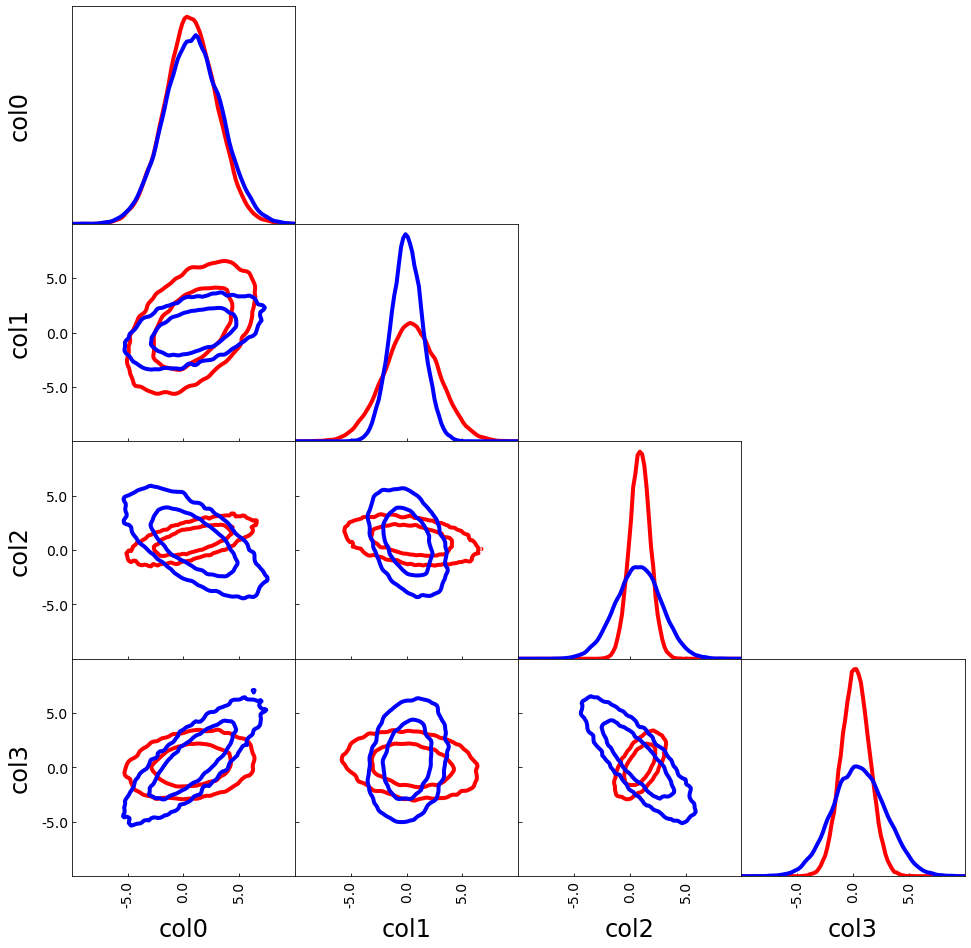

In [10]:
tri = TriangleChain(density_estimation_method='smoothing', n_bins=100, ranges=ranges)
tri.contour_cl(samples1, color='r');
tri.contour_cl(samples2, color='b');

# density image plot

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 30.57it/s]


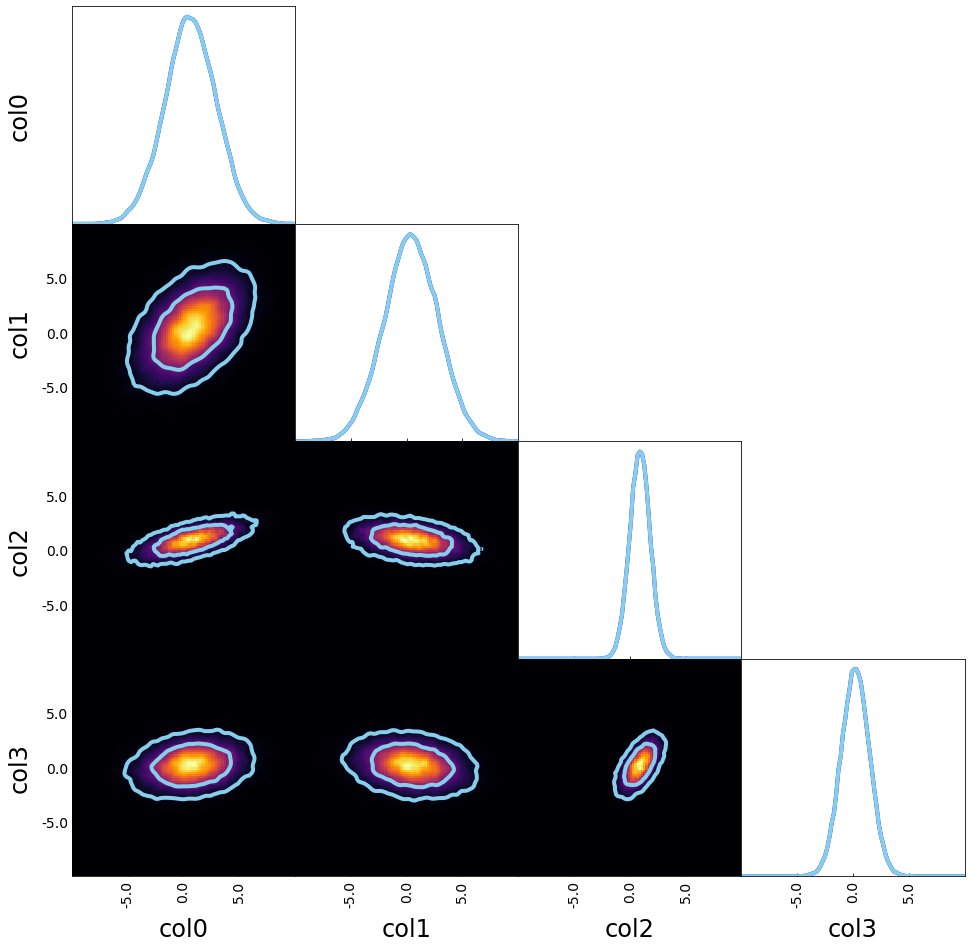

In [11]:
tri = TriangleChain(density_estimation_method='smoothing', n_bins=100, ranges=ranges)
tri.density_image(samples1, cmap=plt.cm.inferno);
tri.contour_cl(samples1, color='skyblue');

# scatter density

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 10.64it/s]


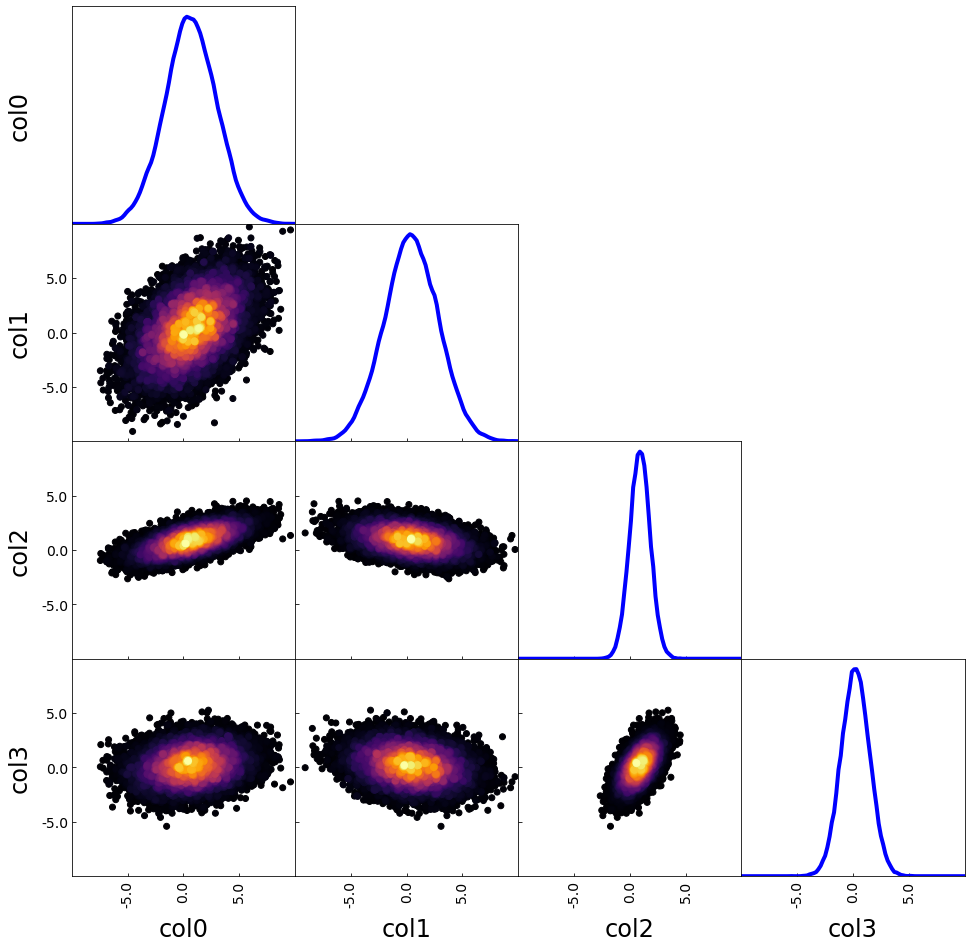

In [12]:
tri = TriangleChain(density_estimation_method='smoothing', n_bins=100, ranges=ranges)
tri.scatter_density(samples1, cmap=plt.cm.inferno);

# simple scatter

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1130.34it/s]


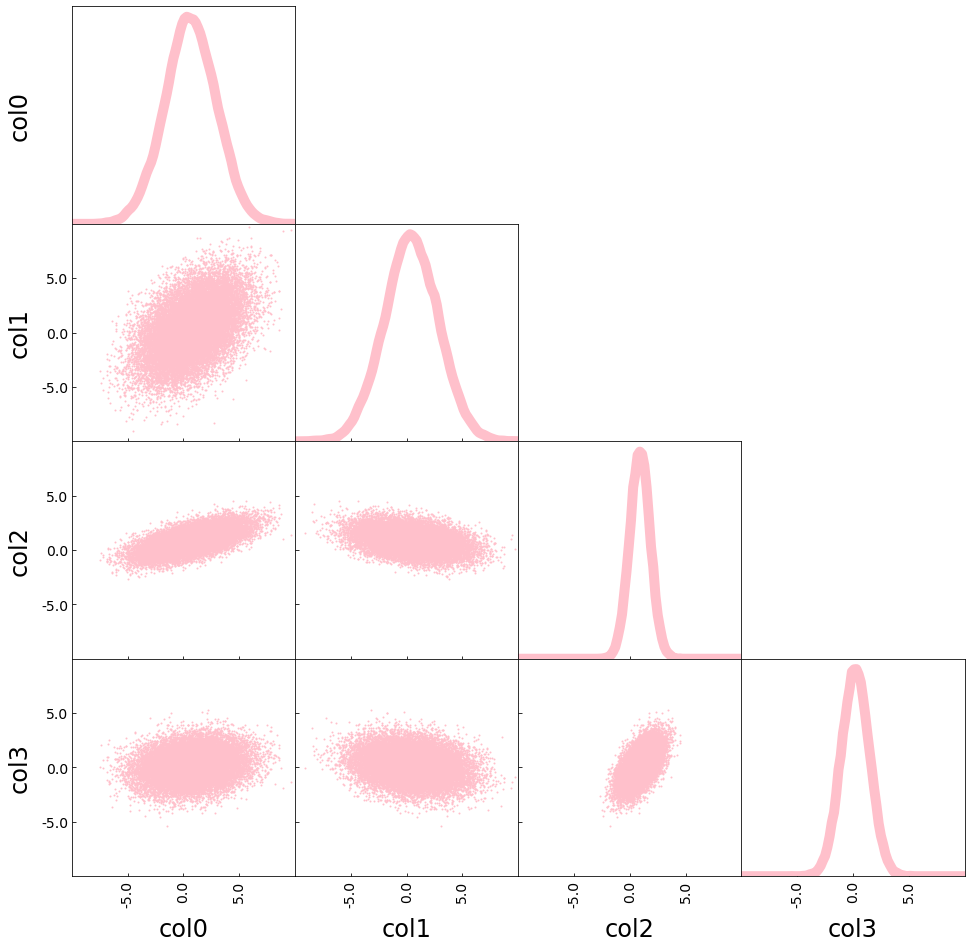

In [13]:
tri = TriangleChain(ranges=ranges, scatter_kwargs={'s':1}, hist_kwargs={'lw':10})
tri.scatter(samples1, color='pink');